In [7]:
#Import the necessary libraries
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math

In [8]:
#For running it on Google Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab\ Notebooks

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks


In [9]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [10]:
#just to make all random sequences on all computers the same.
np.random.seed(1)

In [11]:
#Checking the dataset
print(M)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Sep 13 17:50:05 2015', '__version__': '1.0', '__globals__': [], 'images_train': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'labels_train': array([[1],
       [3],
       [7],
       ...,
       [1],
       [6],
       [2]], dtype=uint8), 'images_test': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'labels_test': array([[8],
       [6],
       [5],
       ...,
       [0],
       [8],
       [5]], dtype=uint8)}


In [12]:
#randomly permute train data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

In [13]:
#randomly permute test data points
inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

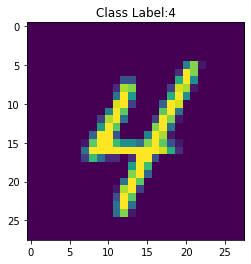

In [14]:
#to visualize the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

In [15]:
'''
Function that implements kNN algorithm for the task of predicting the class for a given test image
'''
def kNN(images_train, labels_train, images_test, labels_test, k):

  per_class_overall_pred = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
  per_class_num_correct_pred = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

  #Iterate over each test image
  for i in range(len(images_test)):
    #Calculate the Euclidean distance between the test image under consideration and all train images
    cal_distances = np.array([euclidean_distance(images_test[i], img_train) for img_train in images_train])
    #Sort the calculated distances
    sorted_cal_distance_idx = cal_distances.argsort()

    #To find k nearest neighbors' labels
    neighbor_labels = []
    for m in range(k):
      neighbor_labels.append(labels_train[sorted_cal_distance_idx[m]][0])

    #To predict the class of test image under consideration using majority voting
    pred_class = max(neighbor_labels, key = neighbor_labels.count)
    actual_class = labels_test[i][0]

    if pred_class == actual_class:
      #Increment the number of correct predictions for each class
      per_class_num_correct_pred[actual_class] += 1
    
    #Increment the total number of predictions for each class
    per_class_overall_pred[actual_class] += 1

  #Calculate per class accuracy
  acc = [0] * 10
  for key in per_class_overall_pred.keys():
    acc[key] = (per_class_num_correct_pred[key]/per_class_overall_pred[key]) * 100
  #Calculate average accuracy
  acc_av = (sum(per_class_num_correct_pred.values())/len(images_test)) * 100
  
  return acc, acc_av

In [16]:
'''
Function to find Euclidean distance between two data points
'''
def euclidean_distance(data_point1, data_point2):
  return np.sqrt(np.sum(np.square(data_point2 - data_point1)))

In [17]:
#To always consider only the first 1000 training images
images_test = images_test[0:1000,:]
labels_test = labels_test[0:1000,:]

In [18]:
#Checking the implemented knn function for 500 train images, 1000 test images, and k=5
acc, acc_av = kNN(images_train[0:500,:], labels_train[0:500,:], images_test, labels_test, 5)
print("Per class accuracy = "+str(acc))
print("Avergae accuracy = "+str(acc_av))

Per class accuracy = [98.05825242718447, 100.0, 79.7979797979798, 86.08695652173914, 79.3103448275862, 67.02127659574468, 93.02325581395348, 87.93103448275862, 76.28865979381443, 82.35294117647058]
Avergae accuracy = 85.2


Calculating accuracies for k=1 ...
Calculating accuracies for k=2 ...
Calculating accuracies for k=3 ...
Calculating accuracies for k=5 ...
Calculating accuracies for k=10 ...


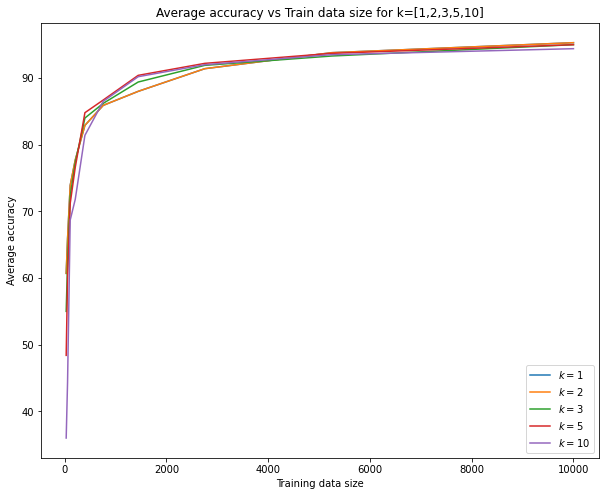

In [19]:
#Extracting 10 differnt data sizes in the range of [30-10000]
train_data_size = np.logspace(1.48, 4, num=10, dtype=int)

plt.figure(figsize=(10, 8))

#Iterating over different values of k
for k in [1,2,3,5,10]:
  print("Calculating accuracies for k="+str(k)+" ...")
  acc_av_train_data_size = [] 
  
  #Iterating over 10 differnt data sizes and calculating the accuracy
  for i in train_data_size:
    acc, acc_av = kNN(images_train[0:i,:], labels_train[0:i,:], images_test, labels_test, k)
    acc_av_train_data_size.append(acc_av)
  plt.plot(train_data_size, acc_av_train_data_size, label='$k = {k}$'.format(k=k))

plt.legend()
plt.xlabel("Training data size")
plt.ylabel("Average accuracy")
plt.title("Average accuracy vs Train data size for k=[1,2,3,5,10]")
plt.show()